In [10]:
import numpy as np
import matplotlib.pyplot as plt
import f90nml as f90 
import os
import sys
sys.path.insert(0,os.getcwd()+'/plasma')
import plasma
import equilibrium_process as eqdsk
%matplotlib inline


In [11]:
HOME = os.path.expanduser('~')
workdir = HOME+'/Desktop/HFS_HHFW_antenna/AORSA_MCGO_Scripts/AORSA/shots/147634'  # absolute path to working directory 
#workdir = HOME+'/Desktop/HFS_HHFW_antenna/AORSA_MCGO_Scripts/AORSA/shots/174658'  # absolute path to working directory
eqdsk_file = workdir + '/g147634.04525'
#eqdsk_file = workdir + '/g174658.3020'
print(HOME)
print(workdir)


/home/vandelij
/home/vandelij/Desktop/HFS_HHFW_antenna/AORSA_MCGO_Scripts/AORSA/shots/147634


In [27]:
plt.figure(figsize=(10, 10))
eq0,fig0=eqdsk.readGEQDSK(eqdsk_file,doplot=False)
print(eq0.keys())

bbbsRE:  re.compile('(?m)^.{10}\\n', re.MULTILINE)
nbbbsStr:  ['   90', '   86']
dict_keys(['nW', 'nH', 'nbbbs', 'limitr', 'rdim', 'zdim', 'rcentr', 'rleft', 'zmid', 'rmaxis', 'zmaxis', 'simag', 'sibry', 'bcentr', 'current', 'fpol', 'pres', 'ffprim', 'pprime', 'psizr', 'qpsi', 'rbbbs', 'zbbbs', 'rlim', 'zlim', 'r', 'z', 'fluxGrid', 'iiInside'])


<Figure size 720x720 with 0 Axes>

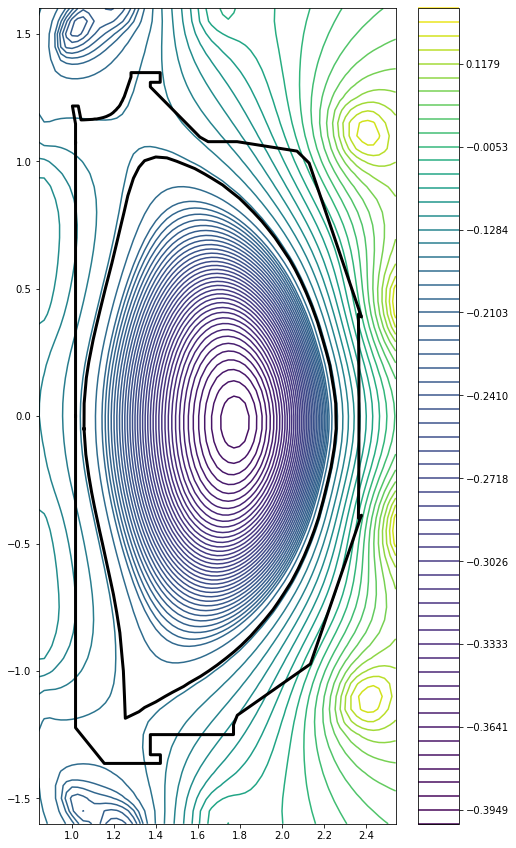

In [28]:
#Plot the equilibrium to view 
r = eq0['r']
z = eq0['z']
psizr = eq0['psizr']
plt.figure(figsize=(8, 15))
img = plt.contour( r, z, psizr.T, levels=np.append(np.linspace(-.4, -0.2, 40), np.linspace(-.19, 0.2, 20) ))
plt.plot(eq0['rlim'], eq0['zlim'], color='black', linewidth=3)
plt.plot(eq0['rbbbs'], eq0['zbbbs'], color='black', linewidth=3)
plt.colorbar(img)

In [ ]:
# Section for reading in the genray density profiles 
gnr_input_path = workdir + '/genray.in'
gnr_nml = f90.read(gnr_input_path)


In [46]:

dentab = gnr_nml['dentab']['prof']
den = np.array(dentab).reshape(26,3)
den

array([[6.00000000e+19, 6.00000000e+19, 6.00000000e+19],
       [5.98672506e+19, 5.98672506e+19, 5.98672506e+19],
       [5.94851849e+19, 5.94851849e+19, 5.94851849e+19],
       [5.88725912e+19, 5.88725912e+19, 5.88725912e+19],
       [5.80455314e+19, 5.80455314e+19, 5.80455314e+19],
       [5.70201882e+19, 5.70201882e+19, 5.70201882e+19],
       [5.58135733e+19, 5.58135733e+19, 5.58135733e+19],
       [5.44448379e+19, 5.44448379e+19, 5.44448379e+19],
       [5.29450271e+19, 5.29450271e+19, 5.29450271e+19],
       [5.13546261e+19, 5.13546261e+19, 5.13546261e+19],
       [4.97237100e+19, 4.97237100e+19, 4.97237100e+19],
       [4.81084976e+19, 4.81084976e+19, 4.81084976e+19],
       [4.65642966e+19, 4.65642966e+19, 4.65642966e+19],
       [4.51440127e+19, 4.51440127e+19, 4.51440127e+19],
       [4.38832040e+19, 4.38832040e+19, 4.38832040e+19],
       [4.28122893e+19, 4.28122893e+19, 4.28122893e+19],
       [4.19515588e+19, 4.19515588e+19, 4.19515588e+19],
       [4.13315506e+19, 4.13315

In [47]:
temtab = gnr_nml['temtab']['prof']
tem = np.array(temtab).reshape(26,3)
tem

array([[4.44281, 5.92375, 5.92375],
       [4.43003, 5.90671, 5.90671],
       [4.39292, 5.85723, 5.85723],
       [4.3328 , 5.77706, 5.77706],
       [4.25065, 5.66753, 5.66753],
       [4.1474 , 5.52987, 5.52987],
       [4.024  , 5.36534, 5.36534],
       [3.8814 , 5.17521, 5.17521],
       [3.72173, 4.96231, 4.96231],
       [3.54797, 4.73063, 4.73063],
       [3.36412, 4.48549, 4.48549],
       [3.1749 , 4.2332 , 4.2332 ],
       [2.9853 , 3.98039, 3.98039],
       [2.79999, 3.73332, 3.73332],
       [2.62237, 3.49649, 3.49649],
       [2.45457, 3.27276, 3.27276],
       [2.29738, 3.06318, 3.06318],
       [2.15171, 2.86895, 2.86895],
       [2.01948, 2.69264, 2.69264],
       [1.90409, 2.53879, 2.53879],
       [1.80979, 2.41305, 2.41305],
       [1.72656, 2.30208, 2.30208],
       [1.62506, 2.16674, 2.16674],
       [1.44556, 1.92741, 1.92741],
       [1.03492, 1.37989, 1.37989],
       [0.10969, 0.14625, 0.14625]])